# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. The requirement is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

# Reading and understanding the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import datetime


from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./data.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning

## Check for duplicated records

In [6]:
df.Id.duplicated().value_counts()

False    1460
Name: Id, dtype: int64

There seems to be no duplicated records in data

In [7]:
df = df[df.columns.drop("Id")]

## Fill nil values

In [8]:
# filling nil values
df.Alley = df.Alley.astype(str).fillna("NA")
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())
df.MasVnrType = df.MasVnrType.fillna("None")
df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.median())
df.BsmtQual = df.BsmtQual.fillna("NA")
df.BsmtCond = df.BsmtCond.fillna("NA")
df.BsmtExposure = df.BsmtExposure.fillna("NA")
df.BsmtFinType1 = df.BsmtFinType1.fillna("NA")
df.BsmtFinType2 = df.BsmtFinType2.fillna("NA")
df.Electrical = df.Electrical.fillna("SBrkr")
df.FireplaceQu = df.FireplaceQu.fillna("NA")
df.GarageType = df.GarageType.fillna("NA")
df.GarageFinish = df.GarageFinish.fillna("NA")
df.GarageQual = df.GarageQual.fillna("NA")
df.GarageCond = df.GarageCond.fillna("NA")
df.PoolQC = df.PoolQC.fillna("NA")
df.Fence = df.Fence.fillna("NA")
df.MiscFeature = df.MiscFeature.fillna("NA")
df.PoolQC = df.PoolQC.fillna("NA")
df.GarageYrBlt = df.apply(lambda d: d.YearBuilt if np.isnan(d.GarageYrBlt) else d.GarageYrBlt, axis=1)

# Visualizing Data

## Create derived metrics

In [9]:
# number of years since built at the time of sale
df["BuiltAge"] = df.YrSold - df.YearBuilt

# number of years since remodel at the time of sale
df["RemodelAge"] = df.YrSold - df.YearRemodAdd

# number of years since remodel at the time of sale
df["GarageBuiltAge"] = df.YrSold - df.GarageYrBlt

# percentage of 1st floor surface area to lot area
df["1stFlrSFPerLotArea"] = df["1stFlrSF"] / df.LotArea

# percentage of 2nd floor surface area to lot area
df["2ndFlrSFPerLotArea"] = df["2ndFlrSF"] / df.LotArea

# percentage of total basement surface area to lot area
df["TotalBsmtSFPerLotArea"] = df["TotalBsmtSF"] / df.LotArea

# number of garage cars to lot area
df["GarageCarsPerLotArea"] = df["GarageCars"] / df.LotArea

# percentage of garage area to garage area
df["GarageAreaPerGarageArea"] = df["GarageArea"] / df.LotArea

# percentage of wooden deck surface area to lot area
df["WoodDeckSFPerLotArea"] = df["WoodDeckSF"] / df.LotArea

# percentage of open porch surface area to lot area
df["OpenPorchSFPerLotArea"] = df["OpenPorchSF"] / df.LotArea

# percentage of enclosed porch surface area to lot area
df["EnclosedPorchPerLotArea"] = df["EnclosedPorch"] / df.LotArea

# percentage of three season porch surface area to lot area
df["3SsnPorchPerLotArea"] = df["3SsnPorch"] / df.LotArea

# percentage of screen porch surface area to lot area
df["ScreenPorchPerLotArea"] = df["ScreenPorch"] / df.LotArea

# percentage of pool surface area to lot area
df["PoolAreaPerLotArea"] = df["PoolArea"] / df.LotArea

# remove unwanted variables
df = df[df.columns.drop("YearBuilt")]
df = df[df.columns.drop("YearRemodAdd")]
df = df[df.columns.drop("GarageYrBlt")]

## Definite categorical variables

In [10]:
categorical_variables = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
    'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
    'MoSold', 'SaleType', 'SaleCondition'
]

numeric_variables = df.columns.drop(categorical_variables)

## Visualizing the numeric variables using PairPlot

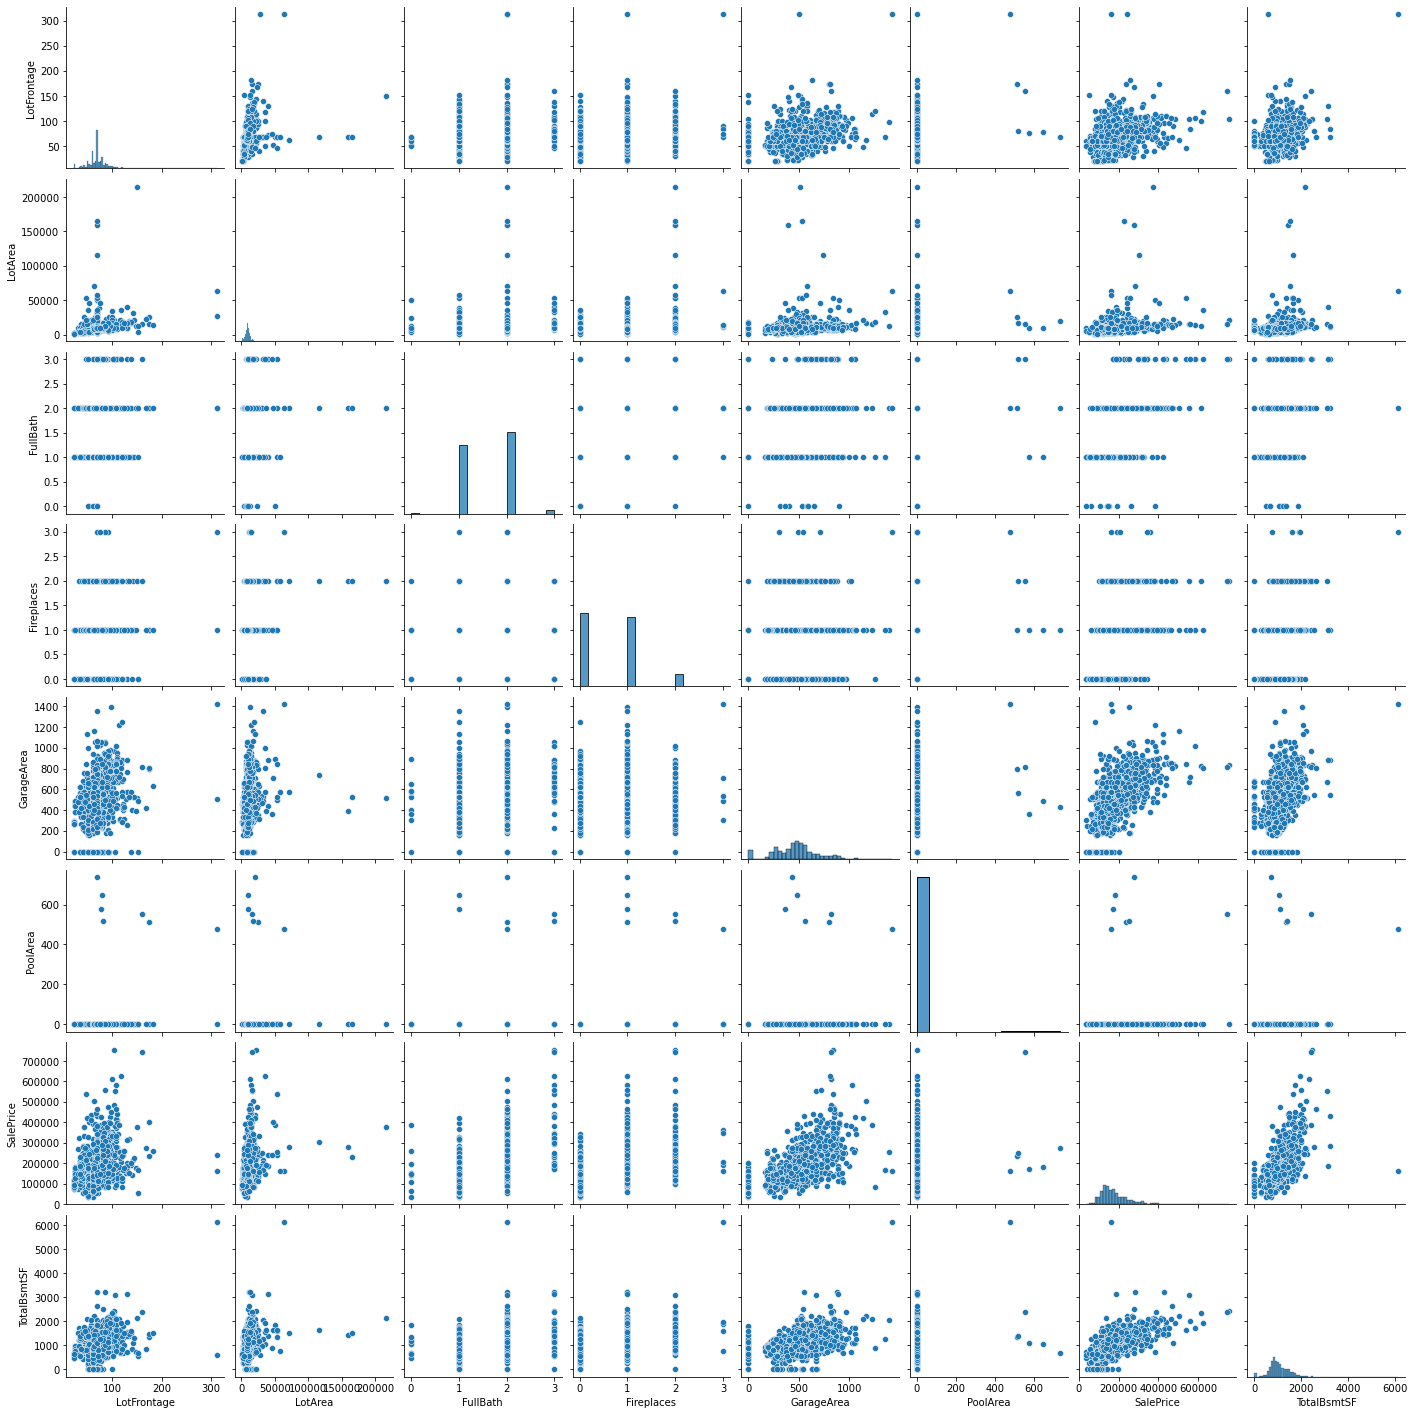

In [11]:
pairplot_variables = [
    'LotFrontage',
    'LotArea',
    'FullBath',
    'Fireplaces',
    'GarageArea',
    'PoolArea',
    'SalePrice',
    'TotalBsmtSF',
]

sns.pairplot(df[pairplot_variables])

## Visualizing numeric variables vs sales price

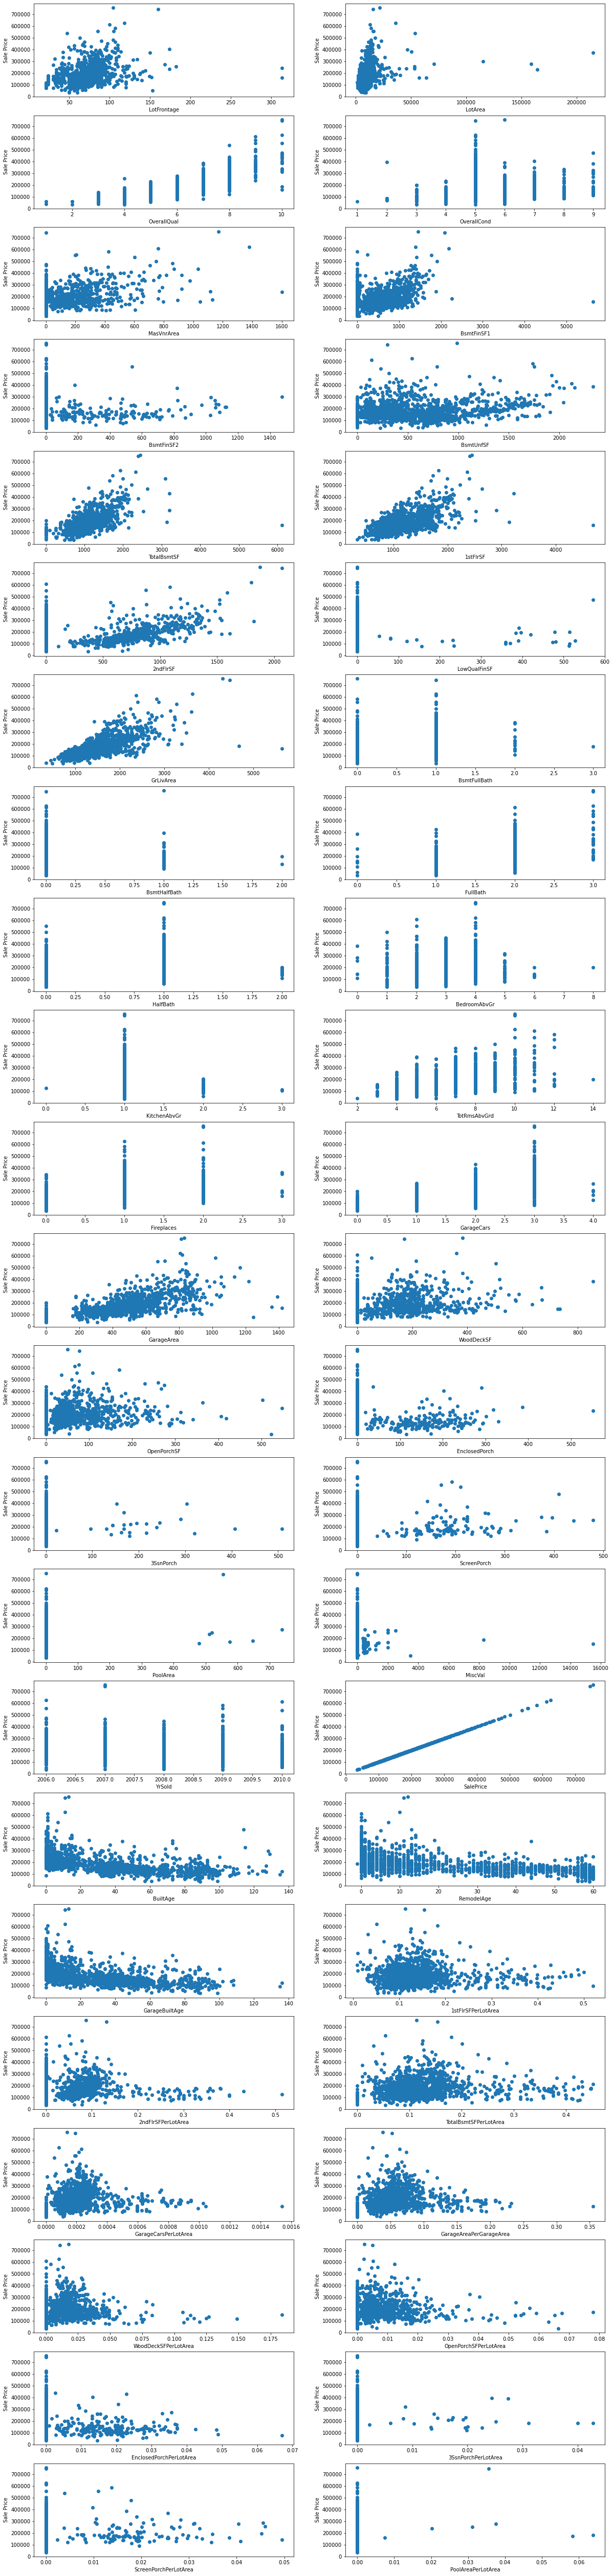

In [12]:
plt.figure(figsize=(20, 120))

for index, variable in enumerate(df.columns.drop(categorical_variables)):
    plt.subplot(30, 2, index + 1)
    plt.scatter(df[variable], df.SalePrice)

    plt.xlabel(variable)
    plt.ylabel("Sale Price")

plt.show()

## Visualizing the categorical variables using BoxPlot

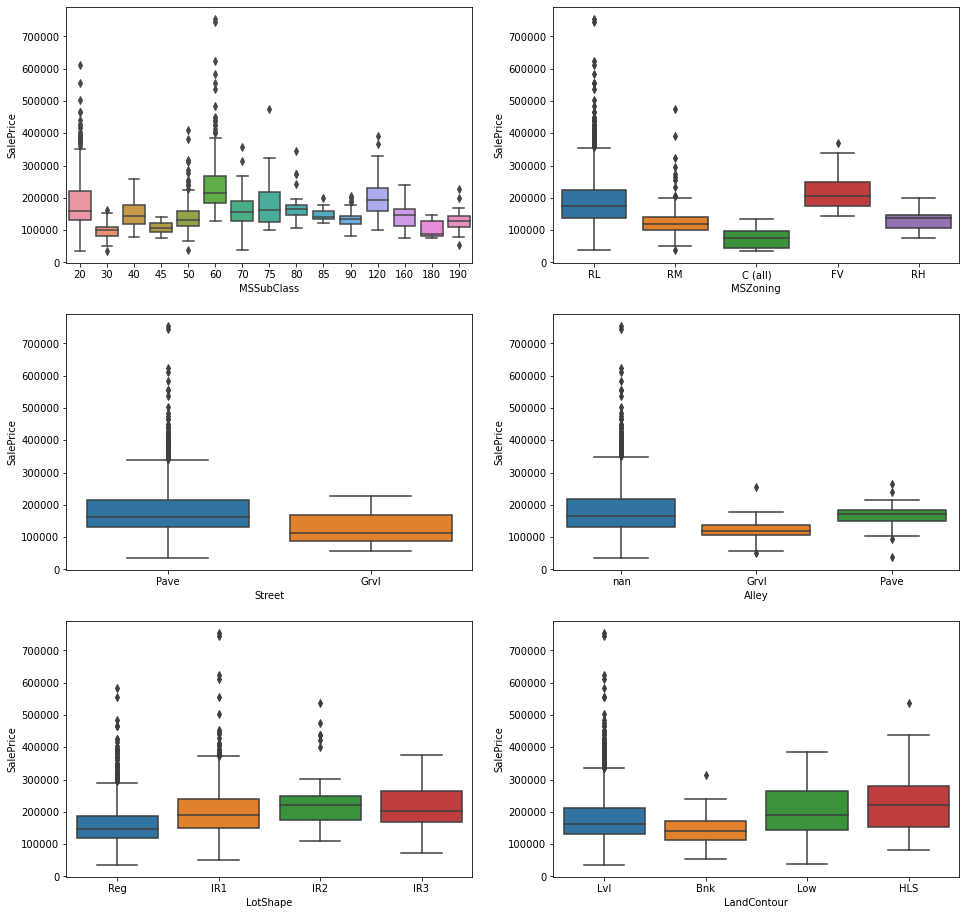

In [13]:
boxplot_variables = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
    'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle',
    'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
    'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir',
    'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
    'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'
]

def plot_next_box_plots(start):
    plt.figure(figsize=(16, 16))

    for index, variable in enumerate(
            boxplot_variables[start:start + 6]):
        plt.subplot(3, 2, index + 1)
        sns.boxplot(x=variable, y='SalePrice', data=df)

    plt.show()

plot_next_box_plots(0)

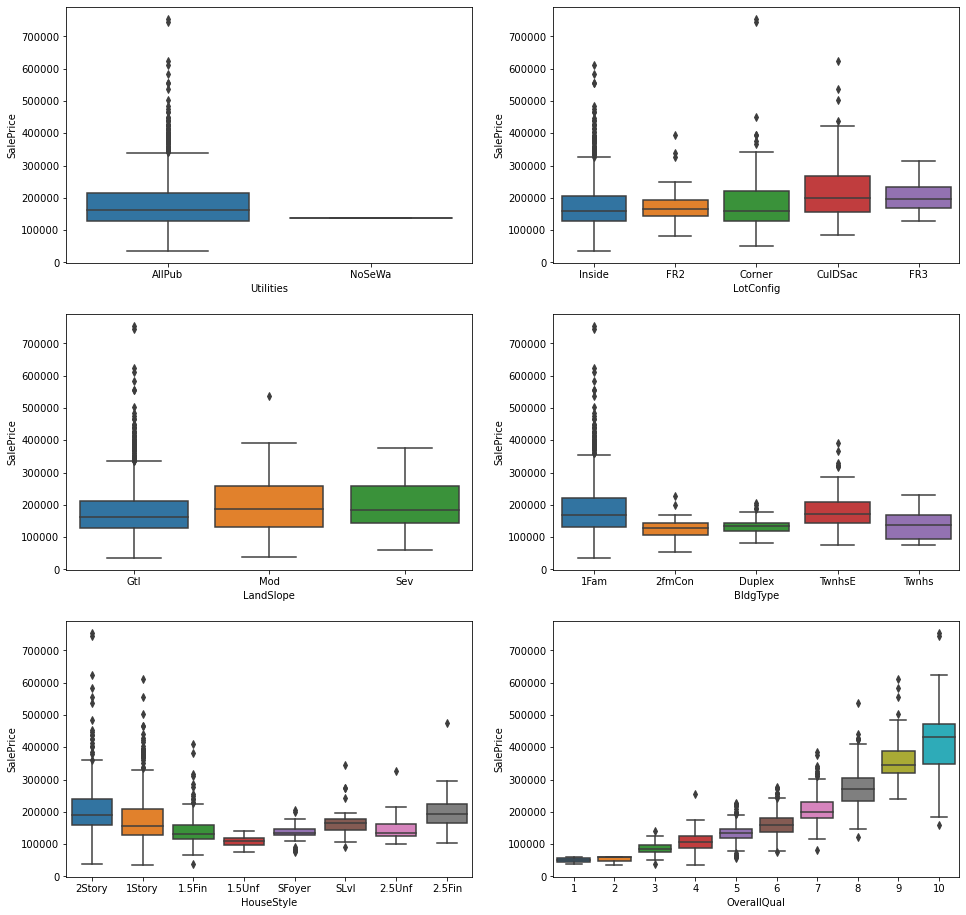

In [14]:
plot_next_box_plots(6)

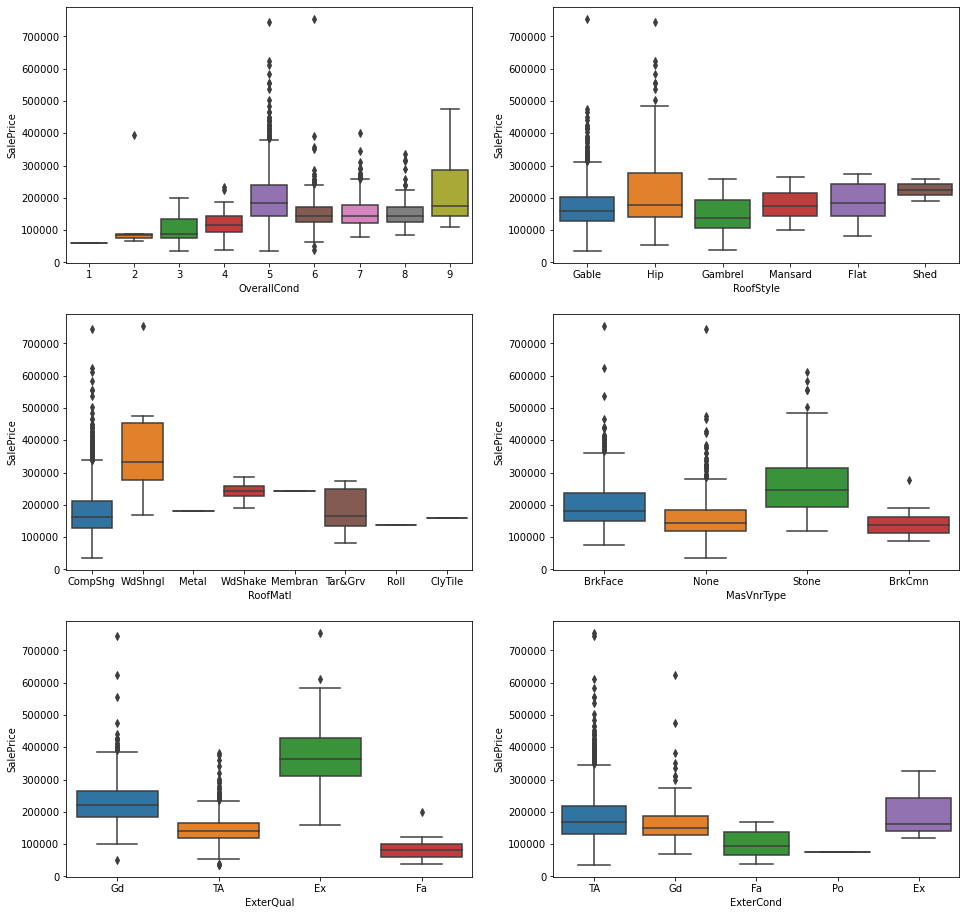

In [15]:
plot_next_box_plots(12)

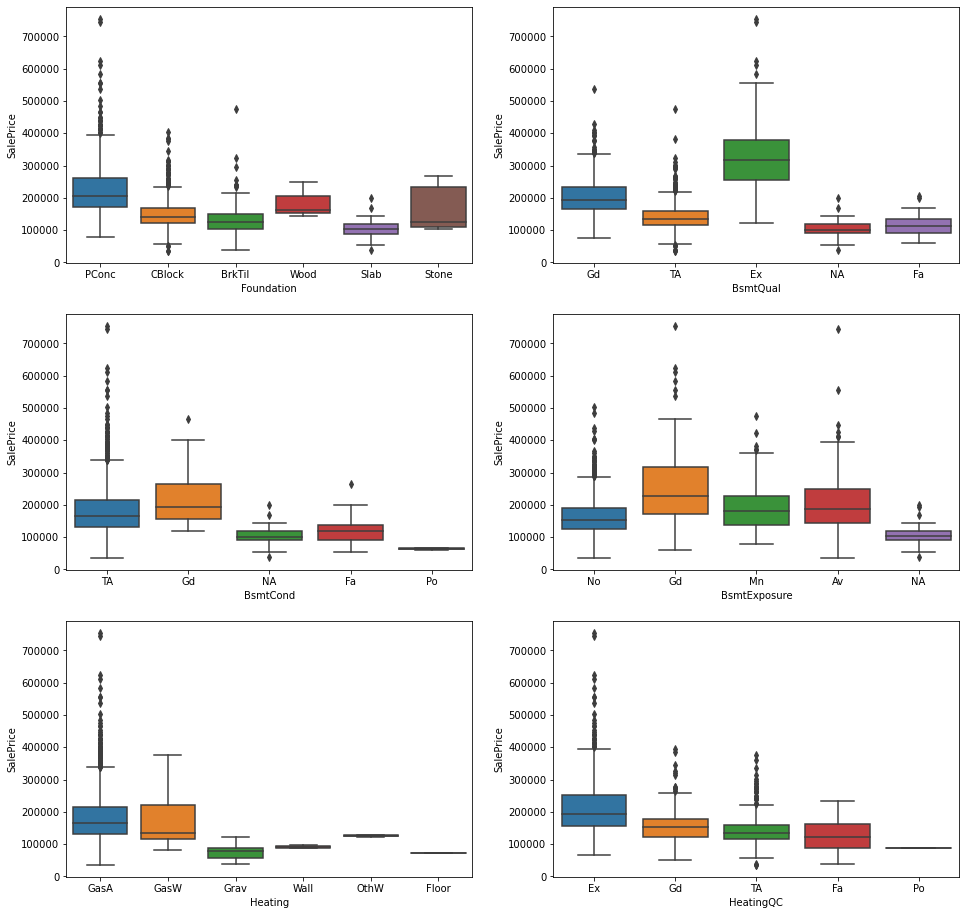

In [16]:
plot_next_box_plots(18)

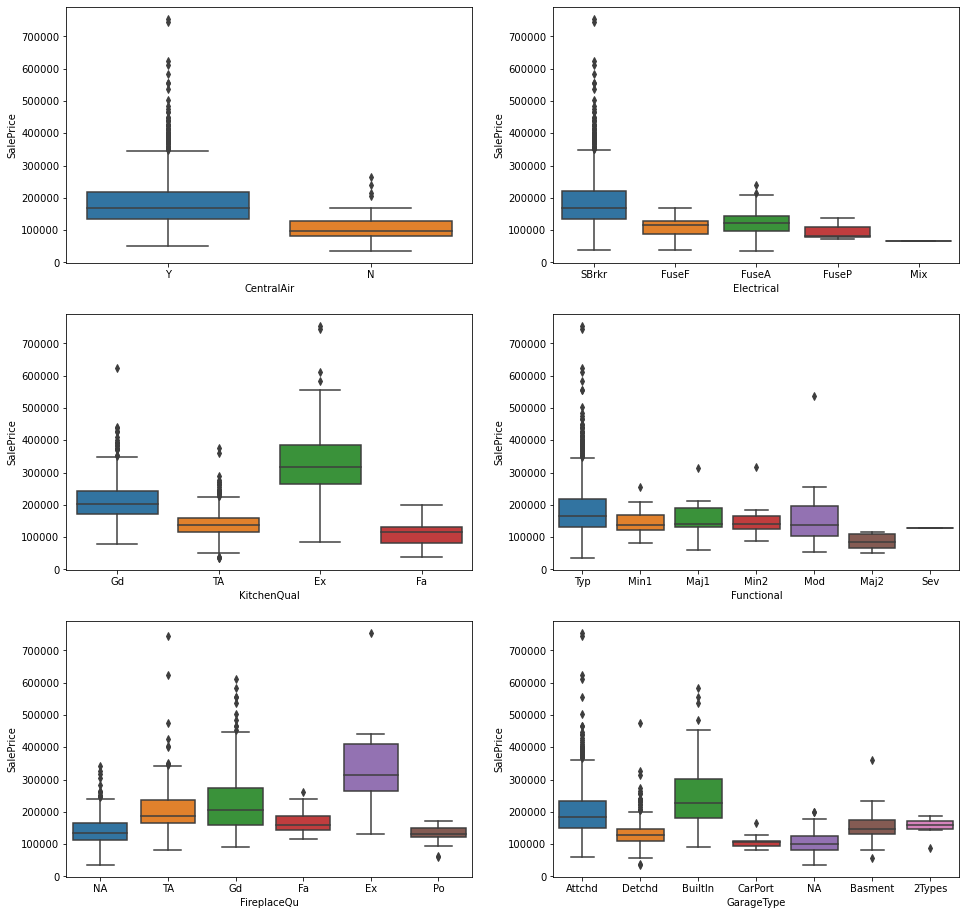

In [17]:
plot_next_box_plots(24)

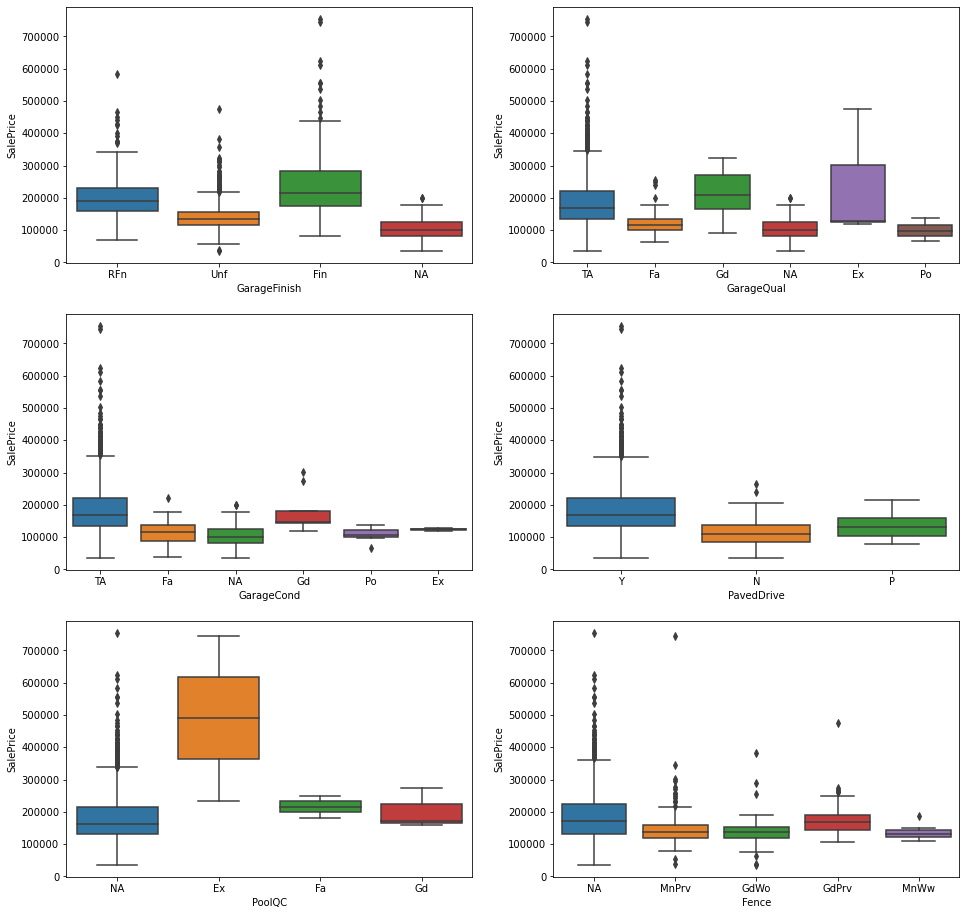

In [18]:
plot_next_box_plots(30)

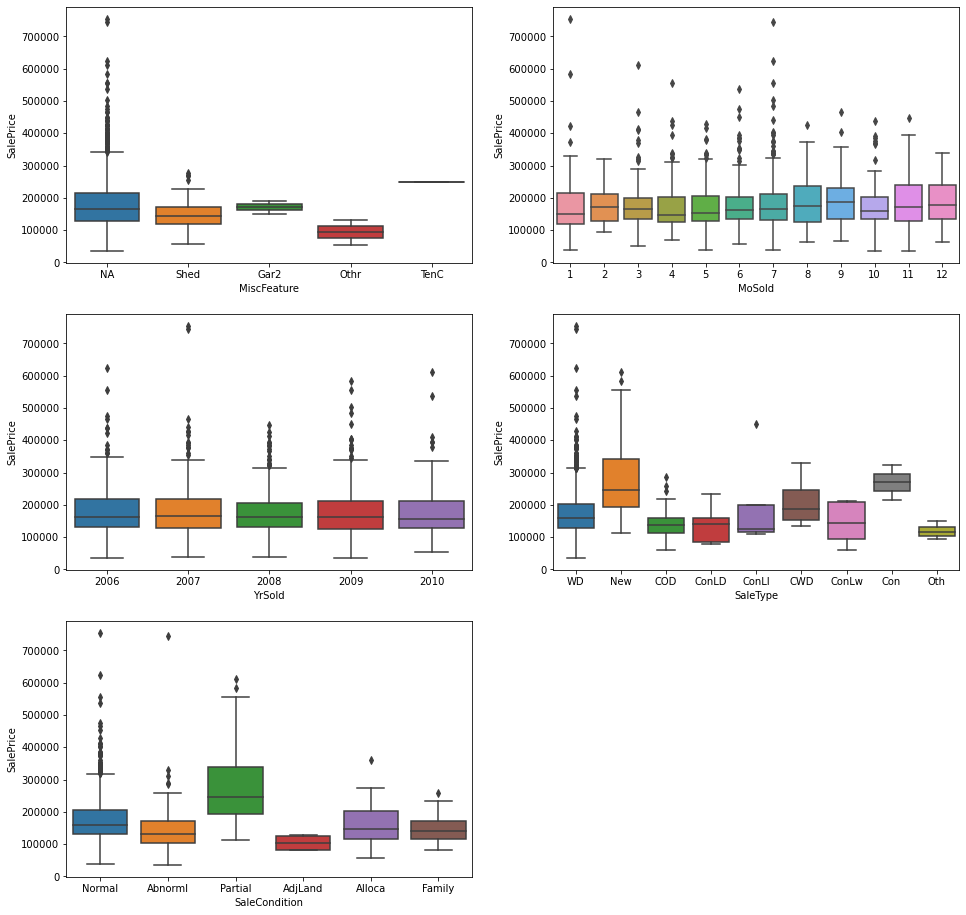

In [19]:
plot_next_box_plots(36)

# Data Preparation

## Create dummy variables

In [20]:
# create dummy variables
dummy_cols = pd.get_dummies(df[categorical_variables], prefix=categorical_variables, columns=categorical_variables, drop_first=True)
    
# add new column to df and drop yr
df = pd.concat([df, dummy_cols], axis=1)

# drop original columns
df = df[df.columns.drop(categorical_variables)]

df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=294)

## Split data into train/test

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

df_train, df_test = train_test_split(df,
                                     train_size=0.7,
                                     test_size=0.3,
                                     random_state=100)

## Rescalaing the Feartures

We will use MinMax scaling to rescale the numeric variables

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [23]:
df_train[numeric_variables] = scaler.fit_transform(df_train[numeric_variables])

In [24]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.157534,0.019306,0.444444,0.625,0.00,0.082920,0.0,0.169521,0.141408,0.113889,...,0,0,0,0,1,0,0,0,1,0
318,0.236301,0.039403,0.666667,0.500,0.16,0.174876,0.0,0.154110,0.220458,0.231481,...,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.555556,0.375,0.00,0.016655,0.0,0.274401,0.120295,0.098611,...,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.017931,0.555556,0.875,0.00,0.000000,0.0,0.207620,0.079378,0.145602,...,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.046139,0.333333,0.625,0.00,0.000000,0.0,0.332620,0.127169,0.202315,...,0,0,0,0,1,0,0,0,1,0


## Dividing into X and Y

In [25]:
def divide_into_x_y(df):
    return df[df.columns.drop('SalePrice')], df.loc[:].pop('SalePrice')

x_train, y_train = divide_into_x_y(df_train)

# Linear regression model with RFE

## Selecting initial feature set using Recursive Feature Elimination (RFE)

In [26]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [27]:
# building linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# performing rfe
rfe = RFE(model, n_features_to_select=20)
rfe = rfe.fit(x_train, y_train)

In [28]:
# list of features selected by RFE and their ranking
rfe_learnings = list(zip(x_train.columns, rfe.support_, rfe.ranking_))
rfe_learnings

[('LotFrontage', False, 133),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 64),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 12),
 ('BsmtUnfSF', False, 11),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 19),
 ('GrLivArea', False, 18),
 ('BsmtFullBath', False, 150),
 ('BsmtHalfBath', False, 227),
 ('FullBath', False, 226),
 ('HalfBath', False, 126),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 138),
 ('Fireplaces', False, 228),
 ('GarageCars', False, 130),
 ('GarageArea', False, 16),
 ('WoodDeckSF', False, 207),
 ('OpenPorchSF', False, 67),
 ('EnclosedPorch', False, 53),
 ('3SsnPorch', False, 158),
 ('ScreenPorch', False, 114),
 ('PoolArea', False, 38),
 ('MiscVal', False, 59),
 ('YrSold', False, 261),
 ('BuiltAge', True, 1),
 ('RemodelAge', False, 80),
 ('GarageBuiltAge', False, 260),
 ('1stFlrSFPerLotArea', False, 10),
 ('2ndFlrSFPerLotAr

In [29]:
# list of selected columns
rfe_selected_cols = x_train.columns[rfe.support_]
rfe_selected_cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'BuiltAge',
       'TotalBsmtSFPerLotArea', 'PoolAreaPerLotArea', 'Condition2_PosN',
       'RoofMatl_WdShngl', 'BsmtQual_Gd', 'BsmtQual_TA', 'Functional_Sev',
       'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_NA'],
      dtype='object')

In [30]:
# list of unselected columns
rfe_unselected_cols = x_train.columns[~rfe.support_]
rfe_unselected_cols

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=273)

## Building model using the features selected by RFE

In [31]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# function to calculate VIF based on the dataframe provided
def calculate_vif(x):
    x = x[x.columns.drop('const')]
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [
        variance_inflation_factor(x.values, i) for i in range(x.shape[1])
    ]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by="VIF", ascending=False)

In [32]:
# creating training dataframe with selected columns
x_train_rfe = x_train[rfe_selected_cols]

In [33]:
# add constant variable
x_train_rfe = sm.add_constant(x_train_rfe)

In [34]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

## Manually eliminating features further

### Iteration 1

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     464.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:22:24   Log-Likelihood:                 1996.5
No. Observations:                1021   AIC:                            -3951.
Df Residuals:                    1000   BIC:                            -3848.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4736      0.093     -5.068      0.000      -0.657      -0.290
LotArea                   0.0903      0.027      3.381      0.001       0.038       0.143
OverallQual               0.1724      0.012     14.268      0.000       0.149       0.196
OverallCond               0.0763      0.009      8.436      0.000       0.059       0.094
BsmtFinSF1                0.1402      0.017      8.410      0.000       0.107       0.173
TotalBsmtSF               0.4418      0.033     13.473      0.000       0.377       0.506
1stFlrSF                  0.3671      0.025     14.966      0.000       0.319       0.415
2ndFlrSF                  0.2137      0.008     26.816      0.000       0.198       0.229
BedroomAbvGr             -0.0982      0.014     -6.868      0.000      -0.126      -0.070
KitchenAbvGr             -0.0757      0.011     -7.098      0.000      -0.097      -0.055
BuiltAge                 -0.1046      0.008    -13.272      0.000      -0.120      -0.089
TotalBsmtSFPerLotArea    -0.0643      0.008     -7.877      0.000      -0.080      -0.048
PoolAreaPerLotArea        1.2776      0.206      6.214      0.000       0.874       1.681
Condition2_PosN          -0.6430      0.036    -17.867      0.000      -0.714      -0.572
RoofMatl_WdShngl          0.0792      0.018      4.450      0.000       0.044       0.114
BsmtQual_Gd              -0.0549      0.004    -14.811      0.000      -0.062      -0.048
BsmtQual_TA              -0.0484      0.004    -11.726      0.000      -0.057      -0.040
Functional_Sev           -0.1395      0.035     -4.007      0.000      -0.208      -0.071
PoolQC_Fa                -0.7951      0.124     -6.405      0.000      -1.039      -0.552
PoolQC_Gd                -0.7368      0.081     -9.146      0.000      -0.895      -0.579
PoolQC_NA                 0.4685      0.093      5.055      0.000       0.287       0.650
==============================================================================
Omnibus:                      251.461   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2086.429
Skew:                           0.886   Prob(JB):                         0.00
Kurtosis:                       9.775   Cond. No.                         472.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As all the 20 features are in the acceptable p-value range, we will find VIF for them for further elimination.

In [36]:
calculate_vif(x_train_rfe)

,Features,VIF
19,PoolQC_NA,72.26
1,OverallQual,42.12
4,TotalBsmtSF,32.85
2,OverallCond,24.15
7,BedroomAbvGr,23.93
5,1stFlrSF,21.76
15,BsmtQual_TA,6.43
9,BuiltAge,6.39
10,TotalBsmtSFPerLotArea,6.00
14,BsmtQual_Gd,4.88


`PoolQC_NA` column has the heighest VIF > 10 thus we will remove the feature.

In [37]:
x_train_rfe = x_train_rfe.drop(["PoolQC_NA"], axis=1)
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  1021 non-null   float64
 1   LotArea                1021 non-null   float64
 2   OverallQual            1021 non-null   float64
 3   OverallCond            1021 non-null   float64
 4   BsmtFinSF1             1021 non-null   float64
 5   TotalBsmtSF            1021 non-null   float64
 6   1stFlrSF               1021 non-null   float64
 7   2ndFlrSF               1021 non-null   float64
 8   BedroomAbvGr           1021 non-null   float64
 9   KitchenAbvGr           1021 non-null   float64
 10  BuiltAge               1021 non-null   float64
 11  TotalBsmtSFPerLotArea  1021 non-null   float64
 12  PoolAreaPerLotArea     1021 non-null   float64
 13  Condition2_PosN        1021 non-null   uint8  
 14  RoofMatl_WdShngl       1021 non-null   uint8  
 15  Bsmt

### Iteration 2

In [38]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     475.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:22:24   Log-Likelihood:                 1983.7
No. Observations:                1021   AIC:                            -3927.
Df Residuals:                    1001   BIC:                            -3829.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0035      0.009     -0.376      0.707      -0.022       0.015
LotArea                   0.0855      0.027      3.165      0.002       0.032       0.139
OverallQual               0.1676      0.012     13.746      0.000       0.144       0.192
OverallCond               0.0799      0.009      8.750      0.000       0.062       0.098
BsmtFinSF1                0.1394      0.017      8.263      0.000       0.106       0.172
TotalBsmtSF               0.4450      0.033     13.411      0.000       0.380       0.510
1stFlrSF                  0.3712      0.025     14.959      0.000       0.323       0.420
2ndFlrSF                  0.2157      0.008     26.770      0.000       0.200       0.232
BedroomAbvGr             -0.1004      0.014     -6.935      0.000      -0.129      -0.072
KitchenAbvGr             -0.0756      0.011     -7.005      0.000      -0.097      -0.054
BuiltAge                 -0.1078      0.008    -13.552      0.000      -0.123      -0.092
TotalBsmtSFPerLotArea    -0.0640      0.008     -7.748      0.000      -0.080      -0.048
PoolAreaPerLotArea        0.2777      0.057      4.890      0.000       0.166       0.389
Condition2_PosN          -0.6454      0.036    -17.717      0.000      -0.717      -0.574
RoofMatl_WdShngl          0.0794      0.018      4.408      0.000       0.044       0.115
BsmtQual_Gd              -0.0558      0.004    -14.893      0.000      -0.063      -0.048
BsmtQual_TA              -0.0493      0.004    -11.813      0.000      -0.058      -0.041
Functional_Sev           -0.1395      0.035     -3.960      0.000      -0.209      -0.070
PoolQC_Fa                -0.2636      0.067     -3.946      0.000      -0.395      -0.132
PoolQC_Gd                -1.0916      0.040    -27.257      0.000      -1.170      -1.013
==============================================================================
Omnibus:                      227.532   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1940.634
Skew:                           0.768   Prob(JB):                         0.00
Kurtosis:                       9.577   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As all the remaining 19 features are in the acceptable p-value range, we will find VIF for them for further elimination.

In [39]:
calculate_vif(x_train_rfe)

,Features,VIF
4,TotalBsmtSF,32.72
1,OverallQual,30.01
5,1stFlrSF,21.67
2,OverallCond,21.15
7,BedroomAbvGr,19.29
15,BsmtQual_TA,6.19
9,BuiltAge,5.72
10,TotalBsmtSFPerLotArea,5.59
14,BsmtQual_Gd,4.46
11,PoolAreaPerLotArea,3.74


`TotalBsmtSF` column has the heighest VIF > 10 thus we will remove the feature.

In [40]:
x_train_rfe = x_train_rfe.drop(["TotalBsmtSF"], axis=1)
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  1021 non-null   float64
 1   LotArea                1021 non-null   float64
 2   OverallQual            1021 non-null   float64
 3   OverallCond            1021 non-null   float64
 4   BsmtFinSF1             1021 non-null   float64
 5   1stFlrSF               1021 non-null   float64
 6   2ndFlrSF               1021 non-null   float64
 7   BedroomAbvGr           1021 non-null   float64
 8   KitchenAbvGr           1021 non-null   float64
 9   BuiltAge               1021 non-null   float64
 10  TotalBsmtSFPerLotArea  1021 non-null   float64
 11  PoolAreaPerLotArea     1021 non-null   float64
 12  Condition2_PosN        1021 non-null   uint8  
 13  RoofMatl_WdShngl       1021 non-null   uint8  
 14  BsmtQual_Gd            1021 non-null   uint8  
 15  Bsmt

### Iteration 3

In [41]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     417.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:22:24   Log-Likelihood:                 1899.3
No. Observations:                1021   AIC:                            -3761.
Df Residuals:                    1002   BIC:                            -3667.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0116      0.010     -1.133      0.258      -0.032       0.008
LotArea                   0.1481      0.029      5.126      0.000       0.091       0.205
OverallQual               0.2104      0.013     16.466      0.000       0.185       0.235
OverallCond               0.0643      0.010      6.538      0.000       0.045       0.084
BsmtFinSF1                0.1980      0.018     11.195      0.000       0.163       0.233
1stFlrSF                  0.5796      0.021     27.590      0.000       0.538       0.621
2ndFlrSF                  0.2019      0.009     23.275      0.000       0.185       0.219
BedroomAbvGr             -0.0801      0.016     -5.128      0.000      -0.111      -0.049
KitchenAbvGr             -0.0917      0.012     -7.877      0.000      -0.115      -0.069
BuiltAge                 -0.1130      0.009    -13.108      0.000      -0.130      -0.096
TotalBsmtSFPerLotArea    -0.0263      0.008     -3.121      0.002      -0.043      -0.010
PoolAreaPerLotArea        0.2959      0.062      4.802      0.000       0.175       0.417
Condition2_PosN          -0.6158      0.039    -15.602      0.000      -0.693      -0.538
RoofMatl_WdShngl          0.0861      0.020      4.403      0.000       0.048       0.124
BsmtQual_Gd              -0.0455      0.004    -11.422      0.000      -0.053      -0.038
BsmtQual_TA              -0.0351      0.004     -8.001      0.000      -0.044      -0.026
Functional_Sev           -0.1475      0.038     -3.858      0.000      -0.223      -0.073
PoolQC_Fa                -0.2958      0.072     -4.082      0.000      -0.438      -0.154
PoolQC_Gd                -0.9702      0.042    -22.908      0.000      -1.053      -0.887
==============================================================================
Omnibus:                      233.571   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1940.582
Skew:                           0.804   Prob(JB):                         0.00
Kurtosis:                       9.560   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As all the remaining 18 features are in the acceptable p-value range, we will find VIF for them for further elimination.

In [42]:
calculate_vif(x_train_rfe)

,Features,VIF
1,OverallQual,27.81
2,OverallCond,20.61
6,BedroomAbvGr,19.15
4,1stFlrSF,12.98
14,BsmtQual_TA,5.81
8,BuiltAge,5.68
9,TotalBsmtSFPerLotArea,4.96
13,BsmtQual_Gd,4.29
10,PoolAreaPerLotArea,3.74
16,PoolQC_Fa,3.63


`OverallQual` column has the heighest VIF > 10 thus we will remove the feature.

In [43]:
x_train_rfe = x_train_rfe.drop(["OverallQual"], axis=1)
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  1021 non-null   float64
 1   LotArea                1021 non-null   float64
 2   OverallCond            1021 non-null   float64
 3   BsmtFinSF1             1021 non-null   float64
 4   1stFlrSF               1021 non-null   float64
 5   2ndFlrSF               1021 non-null   float64
 6   BedroomAbvGr           1021 non-null   float64
 7   KitchenAbvGr           1021 non-null   float64
 8   BuiltAge               1021 non-null   float64
 9   TotalBsmtSFPerLotArea  1021 non-null   float64
 10  PoolAreaPerLotArea     1021 non-null   float64
 11  Condition2_PosN        1021 non-null   uint8  
 12  RoofMatl_WdShngl       1021 non-null   uint8  
 13  BsmtQual_Gd            1021 non-null   uint8  
 14  BsmtQual_TA            1021 non-null   uint8  
 15  Func

### Iteration 4

In [44]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     335.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:22:24   Log-Likelihood:                 1777.0
No. Observations:                1021   AIC:                            -3518.
Df Residuals:                    1003   BIC:                            -3429.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0803      0.010      8.355      0.000       0.061       0.099
LotArea                   0.1365      0.033      4.194      0.000       0.073       0.200
OverallCond               0.0907      0.011      8.303      0.000       0.069       0.112
BsmtFinSF1                0.1859      0.020      9.335      0.000       0.147       0.225
1stFlrSF                  0.7573      0.020     37.298      0.000       0.717       0.797
2ndFlrSF                  0.2730      0.008     32.201      0.000       0.256       0.290
BedroomAbvGr             -0.1194      0.017     -6.864      0.000      -0.154      -0.085
KitchenAbvGr             -0.1385      0.013    -10.886      0.000      -0.164      -0.114
BuiltAge                 -0.1650      0.009    -18.256      0.000      -0.183      -0.147
TotalBsmtSFPerLotArea    -0.0087      0.009     -0.920      0.358      -0.027       0.010
PoolAreaPerLotArea        0.2904      0.069      4.182      0.000       0.154       0.427
Condition2_PosN          -0.6586      0.044    -14.843      0.000      -0.746      -0.572
RoofMatl_WdShngl          0.0963      0.022      4.375      0.000       0.053       0.140
BsmtQual_Gd              -0.0503      0.004    -11.236      0.000      -0.059      -0.042
BsmtQual_TA              -0.0456      0.005     -9.328      0.000      -0.055      -0.036
Functional_Sev           -0.1775      0.043     -4.124      0.000      -0.262      -0.093
PoolQC_Fa                -0.2850      0.082     -3.491      0.001      -0.445      -0.125
PoolQC_Gd                -1.0481      0.047    -22.105      0.000      -1.141      -0.955
==============================================================================
Omnibus:                      158.106   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              954.884
Skew:                           0.549   Prob(JB):                    4.46e-208
Kurtosis:                       7.609   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`TotalBsmtSFPerLotArea` column has the p-value in unacceptable range > 0.05 thus we will remove the feature.

In [45]:
x_train_rfe = x_train_rfe.drop(["TotalBsmtSFPerLotArea"], axis=1)
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               1021 non-null   float64
 1   LotArea             1021 non-null   float64
 2   OverallCond         1021 non-null   float64
 3   BsmtFinSF1          1021 non-null   float64
 4   1stFlrSF            1021 non-null   float64
 5   2ndFlrSF            1021 non-null   float64
 6   BedroomAbvGr        1021 non-null   float64
 7   KitchenAbvGr        1021 non-null   float64
 8   BuiltAge            1021 non-null   float64
 9   PoolAreaPerLotArea  1021 non-null   float64
 10  Condition2_PosN     1021 non-null   uint8  
 11  RoofMatl_WdShngl    1021 non-null   uint8  
 12  BsmtQual_Gd         1021 non-null   uint8  
 13  BsmtQual_TA         1021 non-null   uint8  
 14  Functional_Sev      1021 non-null   uint8  
 15  PoolQC_Fa           1021 non-null   uint8  
 16  PoolQC

### Iteration 5

In [46]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     356.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:22:24   Log-Likelihood:                 1776.6
No. Observations:                1021   AIC:                            -3519.
Df Residuals:                    1004   BIC:                            -3435.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0768      0.009      8.699      0.000       0.060       0.094
LotArea                0.1478      0.030      4.905      0.000       0.089       0.207
OverallCond            0.0910      0.011      8.339      0.000       0.070       0.112
BsmtFinSF1             0.1854      0.020      9.315      0.000       0.146       0.224
1stFlrSF               0.7541      0.020     37.719      0.000       0.715       0.793
2ndFlrSF               0.2730      0.008     32.201      0.000       0.256       0.290
BedroomAbvGr          -0.1160      0.017     -6.826      0.000      -0.149      -0.083
KitchenAbvGr          -0.1384      0.013    -10.880      0.000      -0.163      -0.113
BuiltAge              -0.1636      0.009    -18.390      0.000      -0.181      -0.146
PoolAreaPerLotArea     0.2897      0.069      4.173      0.000       0.153       0.426
Condition2_PosN       -0.6578      0.044    -14.829      0.000      -0.745      -0.571
RoofMatl_WdShngl       0.0964      0.022      4.381      0.000       0.053       0.140
BsmtQual_Gd           -0.0509      0.004    -11.513      0.000      -0.060      -0.042
BsmtQual_TA           -0.0463      0.005     -9.592      0.000      -0.056      -0.037
Functional_Sev        -0.1764      0.043     -4.100      0.000      -0.261      -0.092
PoolQC_Fa             -0.2836      0.082     -3.475      0.001      -0.444      -0.123
PoolQC_Gd             -1.0474      0.047    -22.095      0.000      -1.140      -0.954
==============================================================================
Omnibus:                      156.966   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              939.665
Skew:                           0.546   Prob(JB):                    9.00e-205
Kurtosis:                       7.571   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As all the remaining 16 features are in the acceptable p-value range, we will find VIF for them for further elimination.

In [47]:
calculate_vif(x_train_rfe)

,Features,VIF
5,BedroomAbvGr,18.83
1,OverallCond,15.35
3,1stFlrSF,8.63
12,BsmtQual_TA,5.49
7,BuiltAge,5.30
11,BsmtQual_Gd,3.83
8,PoolAreaPerLotArea,3.74
14,PoolQC_Fa,3.63
4,2ndFlrSF,2.87
2,BsmtFinSF1,2.83


`BedroomAbvGr` column has the heighest VIF > 10 thus we will remove the feature.

In [48]:
x_train_rfe = x_train_rfe.drop(["BedroomAbvGr"], axis=1)
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               1021 non-null   float64
 1   LotArea             1021 non-null   float64
 2   OverallCond         1021 non-null   float64
 3   BsmtFinSF1          1021 non-null   float64
 4   1stFlrSF            1021 non-null   float64
 5   2ndFlrSF            1021 non-null   float64
 6   KitchenAbvGr        1021 non-null   float64
 7   BuiltAge            1021 non-null   float64
 8   PoolAreaPerLotArea  1021 non-null   float64
 9   Condition2_PosN     1021 non-null   uint8  
 10  RoofMatl_WdShngl    1021 non-null   uint8  
 11  BsmtQual_Gd         1021 non-null   uint8  
 12  BsmtQual_TA         1021 non-null   uint8  
 13  Functional_Sev      1021 non-null   uint8  
 14  PoolQC_Fa           1021 non-null   uint8  
 15  PoolQC_Gd           1021 non-null   uint8  
dtypes: flo

### Iteration 6

In [49]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     360.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:22:24   Log-Likelihood:                 1753.5
No. Observations:                1021   AIC:                            -3475.
Df Residuals:                    1005   BIC:                            -3396.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0535      0.008      6.424      0.000       0.037       0.070
LotArea                0.1411      0.031      4.583      0.000       0.081       0.201
OverallCond            0.0901      0.011      8.075      0.000       0.068       0.112
BsmtFinSF1             0.2038      0.020     10.108      0.000       0.164       0.243
1stFlrSF               0.7068      0.019     36.862      0.000       0.669       0.744
2ndFlrSF               0.2402      0.007     33.612      0.000       0.226       0.254
KitchenAbvGr          -0.1564      0.013    -12.288      0.000      -0.181      -0.131
BuiltAge              -0.1610      0.009    -17.721      0.000      -0.179      -0.143
PoolAreaPerLotArea     0.3109      0.071      4.384      0.000       0.172       0.450
Condition2_PosN       -0.6290      0.045    -13.932      0.000      -0.718      -0.540
RoofMatl_WdShngl       0.1103      0.022      4.923      0.000       0.066       0.154
BsmtQual_Gd           -0.0536      0.005    -11.895      0.000      -0.062      -0.045
BsmtQual_TA           -0.0548      0.005    -11.491      0.000      -0.064      -0.045
Functional_Sev        -0.1678      0.044     -3.817      0.000      -0.254      -0.082
PoolQC_Fa             -0.3081      0.083     -3.696      0.000      -0.472      -0.145
PoolQC_Gd             -1.0237      0.048    -21.178      0.000      -1.119      -0.929
==============================================================================
Omnibus:                      163.100   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              848.141
Skew:                           0.623   Prob(JB):                    6.74e-185
Kurtosis:                       7.287   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As all the remaining 15 features are in the acceptable p-value range, we will find VIF for them for further elimination.

In [50]:
calculate_vif(x_train_rfe)

,Features,VIF
1,OverallCond,13.85
3,1stFlrSF,6.27
6,BuiltAge,5.30
11,BsmtQual_TA,4.70
7,PoolAreaPerLotArea,3.72
13,PoolQC_Fa,3.62
10,BsmtQual_Gd,3.51
2,BsmtFinSF1,2.81
0,LotArea,2.07
4,2ndFlrSF,1.86


`OverallCond` column has the heighest VIF > 10 thus we will remove the feature.

In [51]:
x_train_rfe = x_train_rfe.drop(["OverallCond"], axis=1)
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               1021 non-null   float64
 1   LotArea             1021 non-null   float64
 2   BsmtFinSF1          1021 non-null   float64
 3   1stFlrSF            1021 non-null   float64
 4   2ndFlrSF            1021 non-null   float64
 5   KitchenAbvGr        1021 non-null   float64
 6   BuiltAge            1021 non-null   float64
 7   PoolAreaPerLotArea  1021 non-null   float64
 8   Condition2_PosN     1021 non-null   uint8  
 9   RoofMatl_WdShngl    1021 non-null   uint8  
 10  BsmtQual_Gd         1021 non-null   uint8  
 11  BsmtQual_TA         1021 non-null   uint8  
 12  Functional_Sev      1021 non-null   uint8  
 13  PoolQC_Fa           1021 non-null   uint8  
 14  PoolQC_Gd           1021 non-null   uint8  
dtypes: float64(8), uint8(7)
memory usage: 78.8 KB


### Iteration 7

In [52]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:22:25   Log-Likelihood:                 1721.4
No. Observations:                1021   AIC:                            -3413.
Df Residuals:                    1006   BIC:                            -3339.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0959      0.007     14.383      0.000       0.083       0.109
LotArea                0.1311      0.032      4.131      0.000       0.069       0.193
BsmtFinSF1             0.2145      0.021     10.336      0.000       0.174       0.255
1stFlrSF               0.7086      0.020     35.830      0.000       0.670       0.747
2ndFlrSF               0.2447      0.007     33.295      0.000       0.230       0.259
KitchenAbvGr          -0.1738      0.013    -13.429      0.000      -0.199      -0.148
BuiltAge              -0.1381      0.009    -15.514      0.000      -0.156      -0.121
PoolAreaPerLotArea     0.2769      0.073      3.792      0.000       0.134       0.420
Condition2_PosN       -0.6333      0.047    -13.600      0.000      -0.725      -0.542
RoofMatl_WdShngl       0.1078      0.023      4.664      0.000       0.062       0.153
BsmtQual_Gd           -0.0515      0.005    -11.096      0.000      -0.061      -0.042
BsmtQual_TA           -0.0520      0.005    -10.610      0.000      -0.062      -0.042
Functional_Sev        -0.1763      0.045     -3.889      0.000      -0.265      -0.087
PoolQC_Fa             -0.2695      0.086     -3.140      0.002      -0.438      -0.101
PoolQC_Gd             -1.0286      0.050    -20.633      0.000      -1.126      -0.931
==============================================================================
Omnibus:                      143.418   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.382
Skew:                           0.537   Prob(JB):                    1.37e-157
Kurtosis:                       6.979   Cond. No.                         95.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As all the remaining 14 features are in the acceptable p-value range, we will find VIF for them for further elimination.

In [53]:
calculate_vif(x_train_rfe)

,Features,VIF
2,1stFlrSF,4.82
5,BuiltAge,4.01
10,BsmtQual_TA,3.93
6,PoolAreaPerLotArea,3.68
12,PoolQC_Fa,3.59
1,BsmtFinSF1,2.74
9,BsmtQual_Gd,2.57
0,LotArea,2.06
3,2ndFlrSF,1.70
4,KitchenAbvGr,1.17


All the features have VIF under range so we will stop performing further elimination.

## Residual Analysis with Train Data

In [54]:
y_train_pred = model.predict(x_train_rfe)

### Verify error terms are normally distributed

Text(0.5, 0, 'Errors')

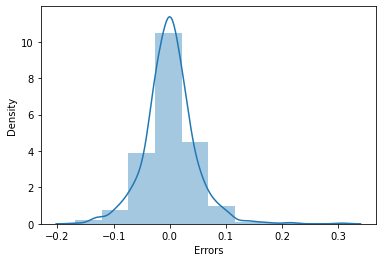

In [55]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=10)
plt.xlabel('Errors')

### Visualize actual vs predicted observations for each feature

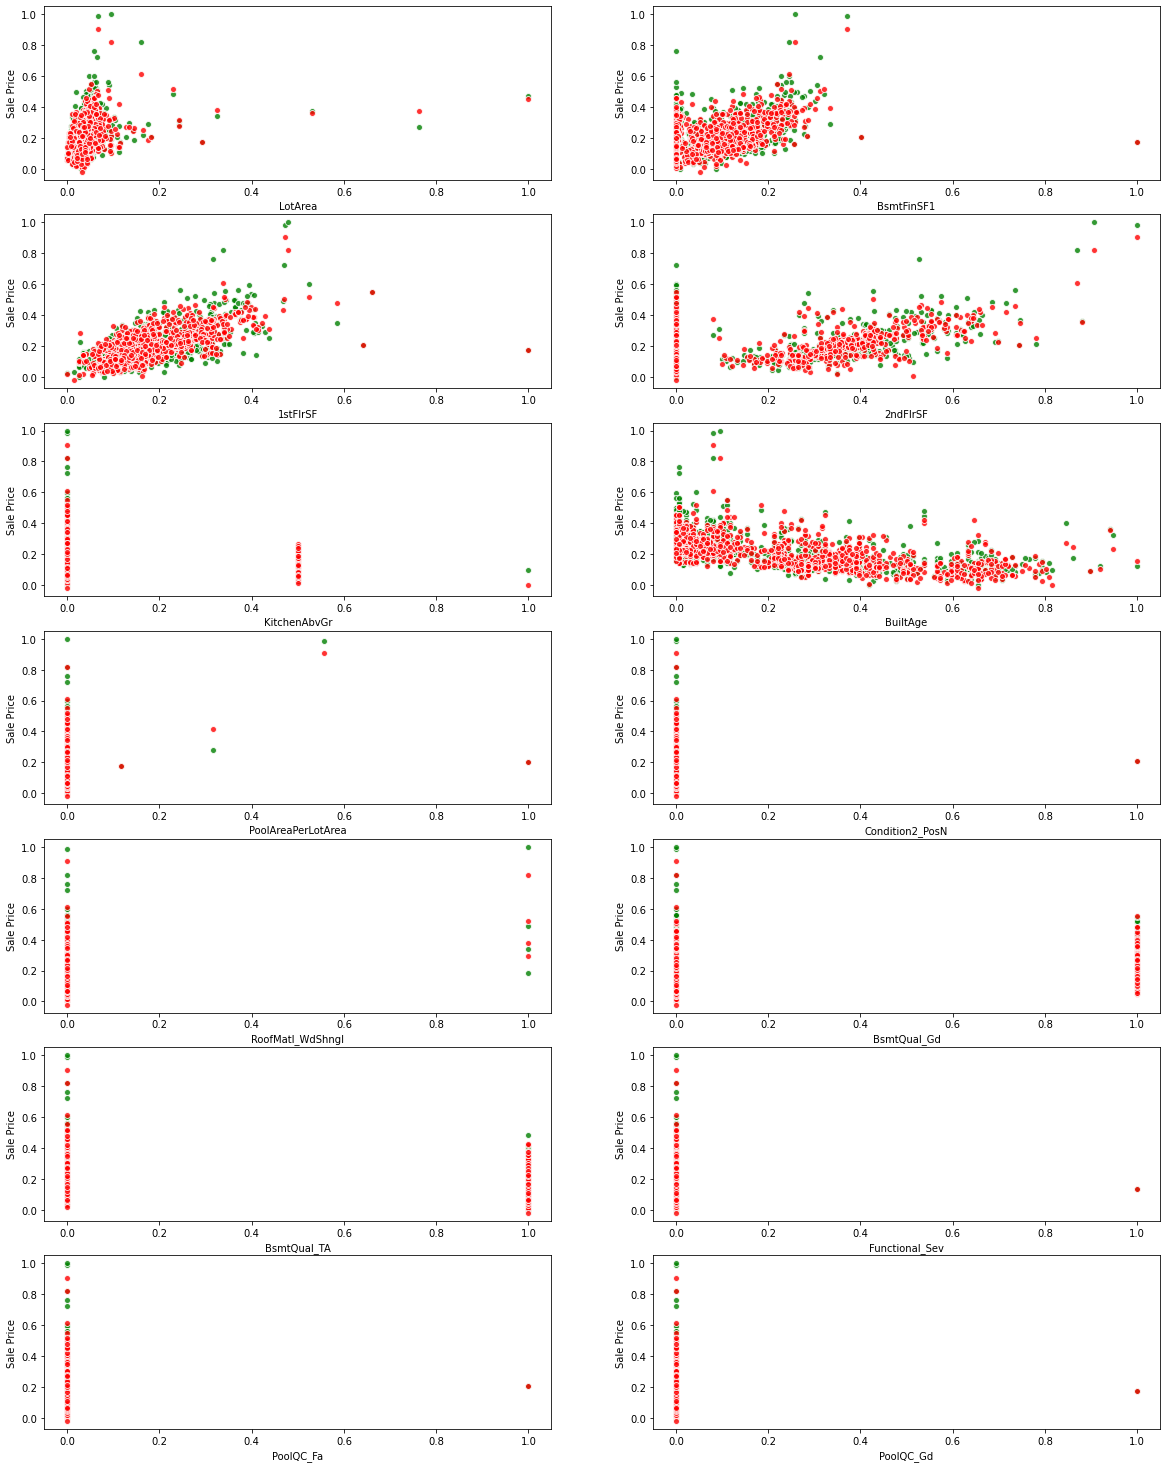

In [56]:
plt.figure(figsize=(20, 30))

for index, variable in enumerate(x_train_rfe.columns.drop("const")):
    column = x_train_rfe[variable]
    seq = np.linspace(column.min(), column.max(),300).reshape(-1, 1)
    
    plt.subplot(8, 2, index + 1)
    plt.scatter(column, y_train, color="green", alpha=0.8, linewidths=1, edgecolor="white")
    plt.scatter(column, y_train_pred, color="red", alpha=0.8, linewidths=1, edgecolor="white")
    
    plt.xlabel(variable)
    plt.ylabel("Sale Price")

plt.show()

### Visualize the spread of predicted vs actual observations

Text(0, 0.5, 'y_train')

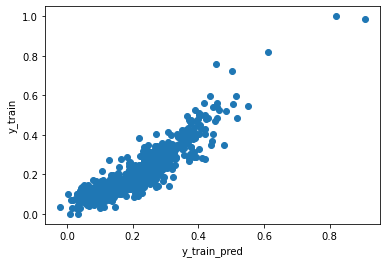

In [57]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train_pred, y_train)
plt.xlabel('y_train_pred')
plt.ylabel('y_train')

### Find r-square for predictions with train data

In [58]:
round(r2_score(y_train, y_train_pred), 2)

0.83

The r2_score on the training data seems to be good enough. As a next step we will test our model on test data to find if it correctly predicts the unseen data. 

## Making Predictions using Test Data

### Preparing test data for prediction

In [59]:
# rescaling features
df_test[numeric_variables] = scaler.transform(df_test[numeric_variables])

# splitting into x & y
x_test, y_test = divide_into_x_y(df_test)

# select only model's feature columns from x_test
x_test_rfe = x_test[x_train_rfe.columns.drop("const")]

# addding constant variable
x_test_rfe = sm.add_constant(x_test_rfe)

sm.add_constant(x_test_rfe)

,const,LotArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,KitchenAbvGr,BuiltAge,PoolAreaPerLotArea,Condition2_PosN,RoofMatl_WdShngl,BsmtQual_Gd,BsmtQual_TA,Functional_Sev,PoolQC_Fa,PoolQC_Gd
1436,1.0,0.035192,0.109142,0.113889,0.000000,0.0,0.264706,0.000000,0,0,0,1,0,0,0
57,1.0,0.047566,0.000000,0.112963,0.416465,0.0,0.014706,0.000000,0,0,1,0,0,0,0
780,1.0,0.029930,0.000000,0.203935,0.000000,0.0,0.088235,0.000000,0,0,1,0,0,0,0
382,1.0,0.036338,0.000000,0.131250,0.415496,0.0,0.007353,0.000000,0,0,1,0,0,0,0
1170,1.0,0.039309,0.092488,0.172685,0.000000,0.0,0.227941,0.912281,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,1.0,0.037999,0.175585,0.154861,0.000000,0.0,0.367647,0.000000,0,0,0,1,0,0,0
555,1.0,0.022936,0.000000,0.156481,0.000000,0.0,0.617647,0.000000,0,0,0,1,0,0,0
399,1.0,0.031099,0.143870,0.171296,0.212107,0.0,0.022059,0.000000,0,0,1,0,0,0,0
545,1.0,0.057820,0.177534,0.232639,0.390315,0.0,0.132353,0.000000,0,0,1,0,0,0,0


### Predicting using test data

In [60]:
y_test_pred = model.predict(x_test_rfe)

### Find r-square for predictions with test data

In [61]:
round(r2_score(y_test, y_test_pred), 2)

0.42

**We can see the r-square score drop from 0.83 to 0.42 showing very poor performance on test data.**

This shows that the simple linear regression model won't be suffice for building a good model. As a next step we will build Ridge, Lasso models from scratch.

# Ridge regression

In [62]:
# we will find r_score for all the different values of lambda
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
                                                  
for i in lambdas: 
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(x_train, y_train)

    # predict values using traning data and calculate r2 score
    y_train_pred = ridgereg.predict(x_train)
    r2_train = r2_score(y_train, y_train_pred)

    # predict values using test data and calculate r2 score
    y_test_pred = ridgereg.predict(x_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(str(i) + " r2 scores")
    print("train: " + str(r2_train))
    print("test: " + str(r2_test) + "\n")

0 r2 scores
train: 0.9525192469625411
test: -1.6388220548447597e+26

0.001 r2 scores
train: 0.9559054649497709
test: 0.7060686934207202

0.01 r2 scores
train: 0.9553695181778028
test: 0.7081484741950297

0.1 r2 scores
train: 0.9514189660765747
test: 0.7334799872653648

1 r2 scores
train: 0.9272971771249846
test: 0.8517847723184417

10 r2 scores
train: 0.8876519859375304
test: 0.8620822716478926

100 r2 scores
train: 0.783788226676598
test: 0.771717829836537

1000 r2 scores
train: 0.553921230987168
test: 0.5323490012539938



Based on the above r2 scores the lambda value of 10 seems to perform good for both train and test data. Lets take one more step to figure out even better value of lambda by trying more lambdas between 1 to 100.

## Exploring Lambdas Further

In [63]:
# we will find r_score for all the different values of lambda
lambdas = range(0,100, 5)
                                                  
for i in lambdas: 
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(x_train, y_train)

    # predict values using traning data and calculate r2 score
    y_train_pred = ridgereg.predict(x_train)
    r2_train = r2_score(y_train, y_train_pred)

    # predict values using test data and calculate r2 score
    y_test_pred = ridgereg.predict(x_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(str(i) + " r2 scores")
    print("train: " + str(r2_train))
    print("test: " + str(r2_test) + "\n")

0 r2 scores
train: 0.9525192469625411
test: -1.6388220548447597e+26

5 r2 scores
train: 0.9014946608299177
test: 0.867174697177033

10 r2 scores
train: 0.8876519859375304
test: 0.8620822716478926

15 r2 scores
train: 0.8772142532407949
test: 0.8554913111541236

20 r2 scores
train: 0.8682283067715146
test: 0.8487983739822251

25 r2 scores
train: 0.8601541675355027
test: 0.842288240354953

30 r2 scores
train: 0.8527549449601318
test: 0.8360391682393509

35 r2 scores
train: 0.845897221717251
test: 0.8300677783527921

40 r2 scores
train: 0.8394935037359279
test: 0.8243685762239152

45 r2 scores
train: 0.8334806240039192
test: 0.8189277192671545

50 r2 scores
train: 0.827810054169525
test: 0.8137285207694568

55 r2 scores
train: 0.8224429386119567
test: 0.8087538250300036

60 r2 scores
train: 0.8173472688736635
test: 0.8039870590112761

65 r2 scores
train: 0.8124961360018143
test: 0.7994126806008724

70 r2 scores
train: 0.8078665747932029
test: 0.7950163385761312

75 r2 scores
train: 0.8034

Still the lambda value of 10 seems to be work best and give good results in both train and test data with the least reduction in accuracy. 

## Coefficients for lambda = 10 

In [161]:
ridgereg = Ridge(alpha = 10)
ridgereg.fit(x_train, y_train)
ridge_coef = pd.DataFrame()

ridge_coef["Columns"] = x_train.columns
ridge_coef["Coef"] = ridgereg.coef_

# top 10 variables impacting predictions
ridge_coef.sort_values(by=['Coef'], ascending=False).head(10)

,Columns,Coef
2,OverallQual,0.068400
93,Neighborhood_NoRidge,0.057822
12,GrLivArea,0.057595
10,2ndFlrSF,0.056260
21,GarageCars,0.043478
9,1stFlrSF,0.042857
15,FullBath,0.041168
140,RoofMatl_WdShngl,0.039033
19,TotRmsAbvGrd,0.038634
94,Neighborhood_NridgHt,0.031050


As there are 293 variables being used to make predictions using this model, lets try to reduce the number of these variables by building a model using Lasso regression.

# Lasso regression

In [65]:
# we will find r_score for all the different values of lambda
lambdas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
                                                  
for i in lambdas: 
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(x_train, y_train)

    # predict values using traning data and calculate r2 score
    y_train_pred = lassoreg.predict(x_train)
    r2_train = r2_score(y_train, y_train_pred)

    # predict values using test data and calculate r2 score
    y_test_pred = lassoreg.predict(x_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(str(i) + " r2 scores")
    print("train: " + str(r2_train))
    print("test: " + str(r2_test) + "\n")

0.0001 r2 scores
train: 0.934934085906921
test: 0.6954311908898487

0.001 r2 scores
train: 0.8216396476681258
test: 0.806066419765664

0.01 r2 scores
train: 0.4571547354099289
test: 0.42279256193969417

0.1 r2 scores
train: 0.0
test: -0.00030262183303753076

1 r2 scores
train: 0.0
test: -0.00030262183303753076

10 r2 scores
train: 0.0
test: -0.00030262183303753076

100 r2 scores
train: 0.0
test: -0.00030262183303753076

1000 r2 scores
train: 0.0
test: -0.00030262183303753076



Based on the above r2 scores the lambda value of 0.001 seems to perform good for both train and test data. Lets take one more step to figure out even better value of lambda by trying more lambdas between 0.0005 to 0.01.

## Exploring Lambdas Further

In [66]:
# we will find r_score for all the different values of lambda
lambdas = range(5, 100, 5)
                                                  
for i in lambdas: 
    i = i / 10000
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(x_train, y_train)
    features_count = len(x_train.columns[lassoreg.coef_ != 0])

    # predict values using traning data and calculate r2 score
    y_train_pred = lassoreg.predict(x_train)
    r2_train = r2_score(y_train, y_train_pred)

    # predict values using test data and calculate r2 score
    y_test_pred = lassoreg.predict(x_test)
    r2_test = r2_score(y_test, y_test_pred)

    
    print(str(i) + " r2 scores")
    print("train: " + str(r2_train))
    print("test: " + str(r2_test))
    print("features count: " + str(features_count) + "\n")

0.0005 r2 scores
train: 0.8566758855671555
test: 0.8385899710935671
features count: 61

0.001 r2 scores
train: 0.8216396476681258
test: 0.806066419765664
features count: 40

0.0015 r2 scores
train: 0.7936461974533602
test: 0.7759770973412249
features count: 30

0.002 r2 scores
train: 0.7664200273693935
test: 0.7466818717995367
features count: 25

0.0025 r2 scores
train: 0.7346711434967919
test: 0.7152029861616469
features count: 26

0.003 r2 scores
train: 0.7022372184447709
test: 0.6835188820095228
features count: 22

0.0035 r2 scores
train: 0.6707158787824543
test: 0.652026143864122
features count: 20

0.004 r2 scores
train: 0.6418725999022665
test: 0.6176799578029427
features count: 18

0.0045 r2 scores
train: 0.6165636333444455
test: 0.5884641296070175
features count: 18

0.005 r2 scores
train: 0.5887771345380346
test: 0.5568409703988362
features count: 18

0.0055 r2 scores
train: 0.558198731926497
test: 0.5223558988407611
features count: 17

0.006 r2 scores
train: 0.533179824164511

Considering both r2 score and the number of features selected by each mode, the lambda value of 0.001 still seems to be better than other.

## Coefficients for lambda = 0.001

In [160]:
lassoreg = Lasso(alpha = 0.001)
lassoreg.fit(x_train, y_train)
lasso_coef = pd.DataFrame()

lasso_coef["Columns"] = x_train.columns[lassoreg.coef_ != 0]
lasso_coef["Coef"] = lassoreg.coef_[lassoreg.coef_ != 0]

lasso_coef.sort_values(by=['Coef'], ascending=False)

,Columns,Coef
1,GrLivArea,2.137264e-01
0,OverallQual,1.772094e-01
4,GarageCars,6.275743e-02
14,Neighborhood_NoRidge,5.702783e-02
26,BsmtExposure_Gd,3.232836e-02
15,Neighborhood_NridgHt,2.790127e-02
38,SaleType_New,1.421795e-02
28,BsmtFinType1_GLQ,1.302067e-02
3,TotRmsAbvGrd,8.621890e-03
16,Condition1_Norm,8.355676e-03


# 2 Degree Polynomial Lasso regression

The previous lasso regression model with lambda 0.001 gives good results but we will still experiment with polynomial regression by converting features to 2 degree polynomials and building the lasso regression model using the new features.

In [68]:
# we will find r_score for all the different values of lambda
lambdas = [0.0001, 0.001, 0.01]

lasso_results = pd.DataFrame(columns=["degree", "lambda", "features", "train_r2", "test_r2"])

# building lasso regression model by converting features into 1 and 2 degree polynomials
for degree in range(1, 3):
    x_train_lasso = x_train.copy()
    x_test_lasso = x_test.copy()
    
    # convert features to polynomial features
    transformer = PolynomialFeatures(degree)
    x_test_lasso = transformer.fit_transform(x_test_lasso)
    x_train_lasso = transformer.fit_transform(x_train_lasso)
                                                      
    for i in lambdas: 
        lassoreg = Lasso(alpha = i)
        lassoreg.fit(x_train_lasso, y_train)
        
        # number of features selected by the model
        features_count = np.count_nonzero(lassoreg.coef_)
        
        # predict values using traning data and calculate r2 score
        y_train_pred = lassoreg.predict(x_train_lasso)
        r2_train = r2_score(y_train, y_train_pred)

        # predict values using test data and calculate r2 score
        y_test_pred = lassoreg.predict(x_test_lasso)
        r2_test = r2_score(y_test, y_test_pred)
        
        lasso_results.loc[len(lasso_results.index)] = [degree, i, features_count, r2_train, r2_test] 
    
        print("degree: " + str(degree))
        print("lambda: " + str(i))
        print("r2 scores")
        print("train: " + str(r2_train))
        print("test: " + str(r2_test))
        print("features count: " + str(features_count) + "\n")

lasso_results

degree: 1
lambda: 0.0001
r2 scores
train: 0.9349340859069211
test: 0.6954311908898487
features count: 122

degree: 1
lambda: 0.001
r2 scores
train: 0.8216396476681258
test: 0.8060664197656638
features count: 40

degree: 1
lambda: 0.01
r2 scores
train: 0.4571547354099289
test: 0.42279256193969417
features count: 8

degree: 2
lambda: 0.0001
r2 scores
train: 0.9763156475348357
test: 0.875794326813996
features count: 461

degree: 2
lambda: 0.001
r2 scores
train: 0.8697605615658376
test: 0.8330591703631118
features count: 87

degree: 2
lambda: 0.01
r2 scores
train: 0.47037161571773833
test: 0.4384503312325062
features count: 19



,degree,lambda,features,train_r2,test_r2
0,1.0,0.0001,122.0,0.934934,0.695431
1,1.0,0.0010,40.0,0.821640,0.806066
2,1.0,0.0100,8.0,0.457155,0.422793
3,2.0,0.0001,461.0,0.976316,0.875794
4,2.0,0.0010,87.0,0.869761,0.833059
5,2.0,0.0100,19.0,0.470372,0.438450


The 2 deg polynomial model with lambdo 0.001 gives little better results but with more than double the number of features included. That is why we will consider the previous model better.

# Conclusion

After building and comparing multiple models we can now conclude that the Lasso Regression model gives us the best results. 40 features are considered by this model for sale price prediction which is a significant reduction from the 293 columns provided originally.

## Final regression model

In [159]:
lassoreg = Lasso(alpha = 0.001)
lassoreg.fit(x_train, y_train)
lasso_coef = pd.DataFrame()

lasso_coef["Columns"] = x_train.columns[lassoreg.coef_ != 0]
lasso_coef["Coef"] = lassoreg.coef_[lassoreg.coef_ != 0]

lasso_coef.sort_values(by=['Coef'], ascending=False)

,Columns,Coef
1,GrLivArea,2.137264e-01
0,OverallQual,1.772094e-01
4,GarageCars,6.275743e-02
14,Neighborhood_NoRidge,5.702783e-02
26,BsmtExposure_Gd,3.232836e-02
15,Neighborhood_NridgHt,2.790127e-02
38,SaleType_New,1.421795e-02
28,BsmtFinType1_GLQ,1.302067e-02
3,TotRmsAbvGrd,8.621890e-03
16,Condition1_Norm,8.355676e-03


### R2 scores

In [151]:
# predict values using traning data and calculate r2 score
y_train_pred = lassoreg.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)

# predict values using test data and calculate r2 score
y_test_pred = lassoreg.predict(x_test)
r2_test = r2_score(y_test, y_test_pred)
    
print("train: " + str(r2_train))
print("test: " + str(r2_test))

train: 0.8216396476681258
test: 0.806066419765664


## Top 10 features

In [152]:
lasso_coef.sort_values(by=['Coef'], ascending=False).head(10)

,Columns,Coef
1,GrLivArea,0.213726
0,OverallQual,0.177209
4,GarageCars,0.062757
14,Neighborhood_NoRidge,0.057028
26,BsmtExposure_Gd,0.032328
15,Neighborhood_NridgHt,0.027901
38,SaleType_New,0.014218
28,BsmtFinType1_GLQ,0.013021
3,TotRmsAbvGrd,0.008622
16,Condition1_Norm,0.008356


# Subjective Questions

## What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

### Ridge Regression

In [140]:
ridgereg = Ridge(alpha = 20)
ridgereg.fit(x_train, y_train)
ridge_coef = pd.DataFrame()

ridge_coef["Columns"] = x_train.columns
ridge_coef["Coef"] = ridgereg.coef_

# top 10 variables impacting predictions
ridge_coef.sort_values(by=['Coef'], ascending=False).head(10)

,Columns,Coef
2,OverallQual,0.054518
93,Neighborhood_NoRidge,0.049648
12,GrLivArea,0.044232
10,2ndFlrSF,0.041377
21,GarageCars,0.036021
15,FullBath,0.035839
19,TotRmsAbvGrd,0.035169
9,1stFlrSF,0.033695
193,BsmtExposure_Gd,0.028693
22,GarageArea,0.028179


In [141]:
# predict values using traning data and calculate r2 score
y_train_pred = ridgereg.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)

# predict values using test data and calculate r2 score
y_test_pred = ridgereg.predict(x_test)
r2_test = r2_score(y_test, y_test_pred)
    
print("train: " + str(r2_train))
print("test: " + str(r2_test))

train: 0.8682283067715146
test: 0.8487983739822251


### Lasso Regression

In [165]:
lassoreg = Lasso(alpha = 0.002)
lassoreg.fit(x_train, y_train)
lasso_coef = pd.DataFrame()

lasso_coef["Columns"] = x_train.columns[lassoreg.coef_ != 0]
lasso_coef["Coef"] = lassoreg.coef_[lassoreg.coef_ != 0]

lasso_coef.sort_values(by=['Coef'], ascending=False)

,Columns,Coef
0,OverallQual,0.165350
1,GrLivArea,0.081937
3,GarageCars,0.055654
9,Neighborhood_NoRidge,0.038216
2,TotRmsAbvGrd,0.032860
16,BsmtExposure_Gd,0.030316
10,Neighborhood_NridgHt,0.019846
18,BsmtFinType1_GLQ,0.017571
24,SaleType_New,0.006863
5,MSSubClass_60,0.006811


In [149]:
# predict values using traning data and calculate r2 score
y_train_pred = lassoreg.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)

# predict values using test data and calculate r2 score
y_test_pred = lassoreg.predict(x_test)
r2_test = r2_score(y_test, y_test_pred)
    
print("train: " + str(r2_train))
print("test: " + str(r2_test))

train: 0.7664200273693935
test: 0.7466818717995367


## After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [168]:
ignore_columns = [
    "GrLivArea",
    "OverallQual",
    "GarageCars",
    'Neighborhood_Blueste',
    'Neighborhood_BrDale',
    'Neighborhood_BrkSide',
    'Neighborhood_ClearCr',
    'Neighborhood_CollgCr',
    'Neighborhood_Crawfor',
    'Neighborhood_Edwards',
    'Neighborhood_Gilbert',
    'Neighborhood_IDOTRR',
    'Neighborhood_MeadowV',
    'Neighborhood_Mitchel',
    'Neighborhood_NAmes',
    'Neighborhood_NPkVill',
    'Neighborhood_NWAmes',
    'Neighborhood_NoRidge',
    'Neighborhood_NridgHt',
    'Neighborhood_OldTown',
    'Neighborhood_SWISU',
    'Neighborhood_Sawyer',
    'Neighborhood_SawyerW',
    'Neighborhood_Somerst',
    'Neighborhood_StoneBr',
    'Neighborhood_Timber',
    'Neighborhood_Veenker',
    'BsmtExposure_Gd',
    'BsmtExposure_Mn',
    'BsmtExposure_NA',
    'BsmtExposure_No',
]

include_columns = x_train.columns.drop(ignore_columns)

x_train_without_top_5 = x_train[include_columns]

In [169]:
lassoreg = Lasso(alpha = 0.002)
lassoreg.fit(x_train_without_top_5, y_train)
lasso_coef = pd.DataFrame()

lasso_coef["Columns"] = x_train_without_top_5.columns[lassoreg.coef_ != 0]
lasso_coef["Coef"] = lassoreg.coef_[lassoreg.coef_ != 0]

lasso_coef.sort_values(by=['Coef'], ascending=False).head(5)

,Columns,Coef
3,GarageArea,0.098253
2,TotRmsAbvGrd,0.085521
16,BsmtFinType1_GLQ,0.032107
0,2ndFlrSF,0.016698
21,GarageType_Attchd,0.010874
